# Time Alignment and Normalization


##Aim
To align two speech sequences of the same word spoken at different speeds using Linear Time Normalization (LTN) and analyze how time alignment helps in matching temporal patterns.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])

# Plot both speech signals to observe their differences in length and amplitude patterns

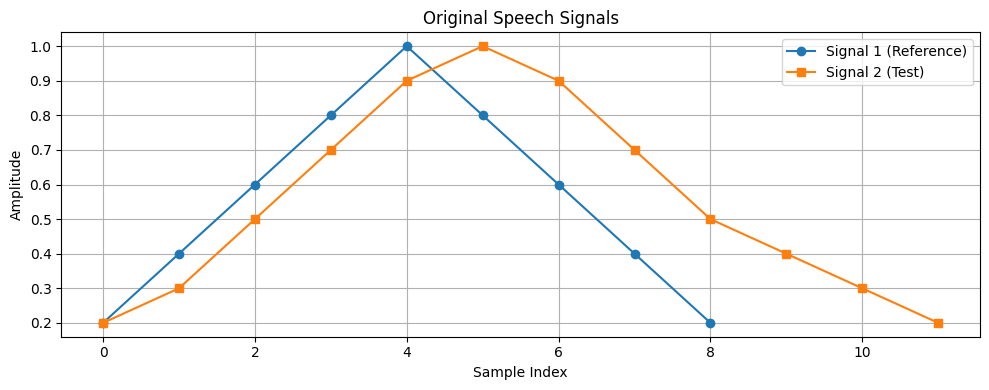

In [3]:
plt.figure(figsize=(10,4))
plt.plot(signal1, marker='o', label='Signal 1 (Reference)')
plt.plot(signal2, marker='s', label='Signal 2 (Test)')
plt.title('Original Speech Signals')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This plot displays both the reference signal (Signal 1) and the test signal (Signal 2) in their original forms.

Signal 1 is shorter, reflecting a word spoken at normal speed.

Signal 2 is longer, reflecting the same word spoken more slowly.

You can see that Signal 2 has more sample points, and while the amplitude patterns are similar, the time axis is stretched.​

# Perform Linear Time Normalization for the two sequences

In [4]:
n1 = len(signal1)
n2 = len(signal2)
x_old = np.arange(n2)
x_new = np.linspace(0, n2-1, n1)
interpolator = interp1d(x_old, signal2, kind='linear')
signal2_normalized = interpolator(x_new)

# Compute the alignment between Signal 1 and the normalized Signal 2

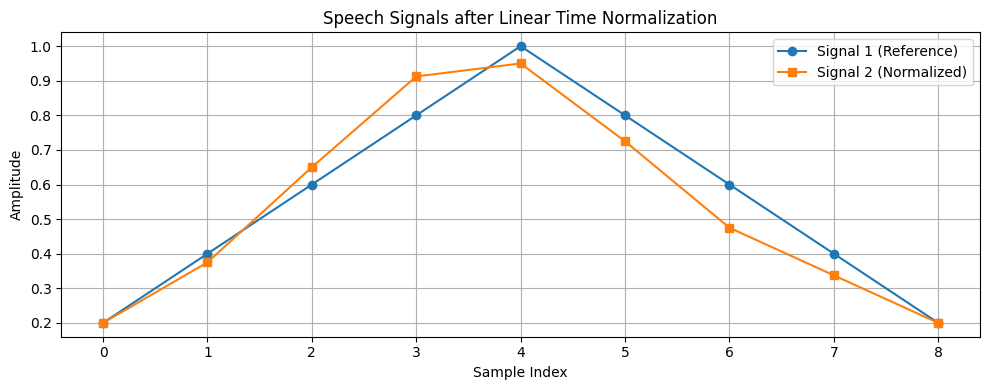

In [5]:
plt.figure(figsize=(10,4))
plt.plot(signal1, marker='o', label='Signal 1 (Reference)')
plt.plot(signal2_normalized, marker='s', label='Signal 2 (Normalized)')
plt.title('Speech Signals after Linear Time Normalization')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This plot shows Signal 1 and the normalized version of Signal 2 after resampling.

Normalized Signal 2 now matches the reference signal in length.

Amplitude patterns between the two signals are closely aligned, making it easier to compare feature locations and temporal patterns.

This demonstrates how Linear Time Normalization adjusts the time axis of a stretched signal so both signals can be analyzed directly.​

# Plot the alignment path, showing how each sample in Signal 1 corresponds to a sample in Signal 2

In [6]:
mse = np.mean((signal1 - signal2_normalized)**2)
print('Mean Squared Error after Normalization:', mse)

Mean Squared Error after Normalization: 0.004826388888888888


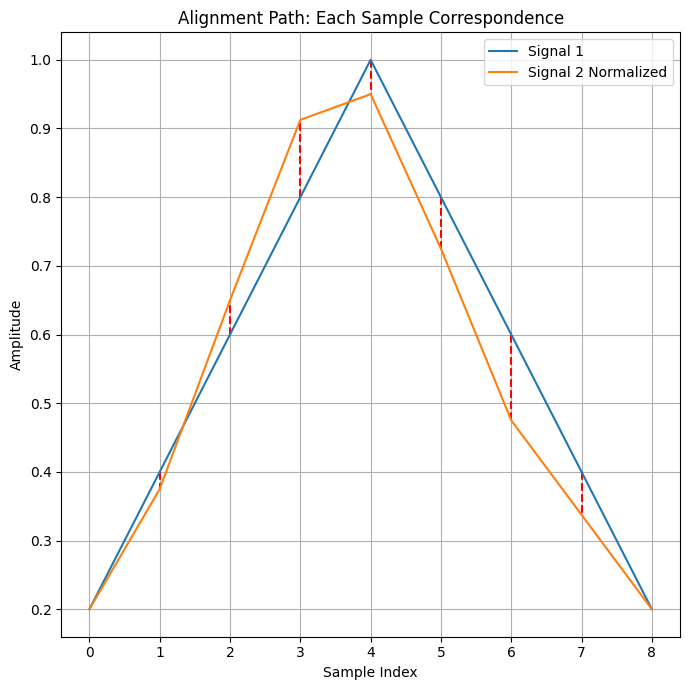

In [7]:
plt.figure(figsize=(7,7))
for k in range(n1):
    plt.plot([k, k], [signal1[k], signal2_normalized[k]], 'r--')
plt.plot(signal1, label='Signal 1')
plt.plot(signal2_normalized, label='Signal 2 Normalized')
plt.title('Alignment Path: Each Sample Correspondence')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This plot illustrates the alignment path between Signal 1 and the normalized Signal 2.

Red dashed lines show how each sample in Signal 1 corresponds to the matched sample in normalized Signal 2.

This visualization makes it clear that, after normalization, most samples align linearly and feature peaks/troughs correspond between both signals.

It demonstrates effective time alignment, confirming that corresponding waveform segments can be compared, which is useful for tasks such as speech recognition or speaker verification.​

##Inference
Linear Time Normalization aligns two speech signals by resampling the longer signal to have the same number of samples as the reference signal, essentially compressing its time axis to match the reference.

This process ensures that temporal patterns and features occurring in both signals are aligned at similar sample indices, allowing direct, sample-by-sample comparison. As a result, waveform peaks, valleys, and other important structures coincide for both signals, even if they were originally spoken at different speeds.

The method is most effective when the speed difference between the signals is consistent throughout their duration. It enables robust analysis for tasks such as speech matching or recognition, though it may not handle variable-rate (nonlinear) timing differences within different regions of the signal as well as more advanced techniques like Dynamic Time Warping.